# RFM analysis: Segmentation of customers.
---
Murilo H. Gomes

Write about the analysis and purpose.

## Libraries and Functions:

### Imports:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sb

%matplotlib inline

In [ ]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotly.subplots import make_subplots

### Scripts:

In [ ]:
def RecencyClassification(x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

def FrequencyMonetaryClassification(x,p,d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 4
    else:
        return 5

## Data acessing:

In [ ]:
raw_data_response = pd.read_csv('path')
raw_data_response.head(3)

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1


In [ ]:
raw_data_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


In [ ]:
raw_data_transaction = pd.read_csv('path')
raw_data_transaction['trans_date'] = pd.to_datetime(raw_data_transaction['trans_date'], infer_datetime_format = 'True')
raw_data_transaction['trans_date'] = raw_data_transaction['trans_date'].dt.date
raw_data_transaction = raw_data_transaction.sort_values('trans_date', axis = 0)
raw_data_transaction.head(3)

,customer_id,trans_date,tran_amount
56171,CS3366,2011-05-16,77
77394,CS4165,2011-05-16,97
2548,CS1849,2011-05-16,79


In [ ]:
raw_data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 56171 to 33421
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


### Recency, frequency and monetary value of customers:

In [ ]:
print('The first and the last day registreds are, respectivaly:')
print(raw_data_transaction['trans_date'].min(), 'and', raw_data_transaction['trans_date'].max())

The first and the last day registreds are, respectivaly:
2011-05-16 and 2015-03-16


We will take the 'last day' as the day before 2015-03-16.

In [ ]:
last_day = raw_data_transaction['trans_date'].max() + datetime.timedelta(days=1)

raw_data_transaction['diff']= last_day - raw_data_transaction['trans_date']
raw_data_transaction['diff'].astype('timedelta64[D]')
raw_data_transaction['diff']=raw_data_transaction['diff'] / np.timedelta64(1, 'D')
raw_data_transaction.head()

,customer_id,trans_date,tran_amount,diff
56171,CS3366,2011-05-16,77,1401.0
77394,CS4165,2011-05-16,97,1401.0
2548,CS1849,2011-05-16,79,1401.0
57968,CS4432,2011-05-16,41,1401.0
80045,CS5573,2011-05-16,93,1401.0


In [ ]:
raw_data_transaction

,customer_id,trans_date,tran_amount,diff
56171,CS3366,2011-05-16,77,1401.0
77394,CS4165,2011-05-16,97,1401.0
2548,CS1849,2011-05-16,79,1401.0
57968,CS4432,2011-05-16,41,1401.0
80045,CS5573,2011-05-16,93,1401.0
...,...,...,...,...
98929,CS4478,2015-03-16,87,1.0
38660,CS4481,2015-03-16,100,1.0
46124,CS5665,2015-03-16,38,1.0
117623,CS8141,2015-03-16,64,1.0


In [ ]:
rfm = raw_data_transaction.groupby('customer_id').agg({'diff': lambda x:x.min(),
                                        'customer_id': lambda x: len(x),
                                        'tran_amount': lambda x: x.sum()})
rfm = rfm.rename(columns= {'diff': 'recency', 'customer_id': 'frequency',
                           'tran_amount': 'monetary value'})

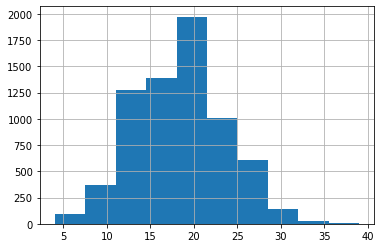

In [ ]:
rfm['frequency'].hist()
plt.show()

We can't define 'new' customers as that maked their first and last shope in the last 3 mounths, because the minumum shope frequency in the dataset is 4.

### Quintiles clustering:

In [ ]:
quintiles = rfm.quantile(q=[0.20,0.40,0.60,0.80])
print(quintiles, type(quintiles))

     recency  frequency  monetary value
0.2     18.0       14.0           681.0
0.4     40.0       17.0          1095.0
0.6     73.0       19.8          1345.0
0.8    129.0       23.0          1589.0 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quintiles=quintiles.to_dict()
quintiles

{'recency': {0.2: 18.0, 0.4: 40.0, 0.6: 73.0, 0.8: 129.0},
 'frequency': {0.2: 14.0, 0.4: 17.0, 0.6: 19.800000000000182, 0.8: 23.0},
 'monetary value': {0.2: 681.0, 0.4: 1095.0, 0.6: 1345.0, 0.8: 1589.0}}

### Segmentation and application of users conditions:

In [ ]:
rfmSegmen = rfm
rfmSegmen['RecencyScore'] = rfmSegmen['recency'].apply(RecencyClassification, args=('recency',quintiles))
rfmSegmen['FrequencyScore'] = rfmSegmen['frequency'].apply(FrequencyMonetaryClassification, args=('frequency',quintiles))
rfmSegmen['MonetaryScore'] = rfmSegmen['monetary value'].apply(FrequencyMonetaryClassification, args=('monetary value',quintiles))

In [ ]:
rfmSegmen

,recency,frequency,monetary value,RecencyScore,FrequencyScore,MonetaryScore
customer_id,,,,,,
CS1112,62.0,15,1012,3,2,2
CS1113,36.0,20,1490,4,4,4
CS1114,33.0,19,1432,4,3,4
CS1115,12.0,22,1659,5,4,5
CS1116,204.0,13,857,1,1,2
...,...,...,...,...,...,...
CS8996,98.0,13,582,2,1,1
CS8997,262.0,14,543,1,1,1
CS8998,85.0,13,624,2,1,1


In [ ]:
a = rfmSegmen.loc[rfmSegmen['RecencyScore'] == 5]

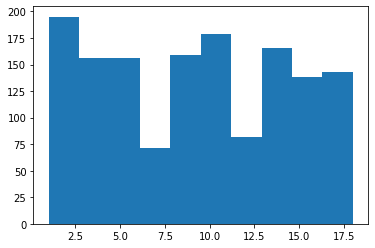

In [ ]:
plt.hist(a['recency'])
plt.show()

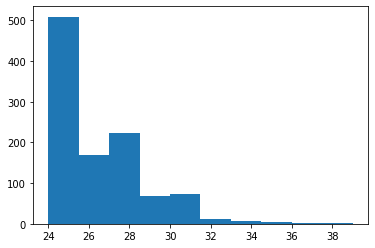

In [ ]:
plt.hist(rfmSegmen.loc[rfmSegmen['FrequencyScore'] == 5]['frequency'])
plt.show()

In [ ]:
# FM Score
rfmSegmen = rfmSegmen.assign(FrequencyMonetaryScore = lambda x: (x.FrequencyScore + x.MonetaryScore)/2, axis = 1)

In [ ]:
segmentos =  ['Campeões', 'Fieis','Promissores', 'Não Perder', 'Hibernando', 'Perdidos']

In [ ]:
# Aplicando Segmentação

limit_new = 7 # last week customers

conditions = [
    ((rfmSegmen['RecencyScore'].between(4, 5, inclusive = 'both')) & (rfmSegmen['FrequencyMonetaryScore'].between(4, 5, inclusive = 'both'))), # Campeões
    ((rfmSegmen['RecencyScore'] == 3) & (rfmSegmen['FrequencyMonetaryScore'].between(3, 3.99, inclusive = 'both'))), # Fieis
    ((rfmSegmen['RecencyScore'].between(4, 5, inclusive = 'both')) & (rfmSegmen['FrequencyMonetaryScore'].between(1, 2.99, inclusive = 'both'))), # Promissor
    ((rfmSegmen['RecencyScore'].between(1, 2.99, inclusive = 'both')) & (rfmSegmen['FrequencyMonetaryScore'].between(4, 5, inclusive = 'both'))), # Perdendo alto tkt médio
    (((rfmSegmen['RecencyScore'] == 3) & (rfmSegmen['FrequencyMonetaryScore'].between(1, 2.99, inclusive = 'both')) ) | ( (rfmSegmen['RecencyScore'] == 2) & (rfmSegmen['FrequencyMonetaryScore'].between(2, 3.99, inclusive = 'both')) ) ), # Hibernando
    ((rfmSegmen['RecencyScore'] == 1) & (rfmSegmen['FrequencyMonetaryScore'].between(1, 3.99, inclusive = 'both')))# Perdidos
]

choices = segmentos
rfmSegmen['Segmento'] = np.select(conditions, choices, default = 'Perdidos')

print('-----------------------------------')
print('Número de clientes para cada segmento')
print(rfmSegmen['Segmento'].value_counts())

-----------------------------------
Número de clientes para cada segmento
Perdidos       2487
Campeões       1227
Hibernando     1153
Promissores    1092
Não Perder      710
Fieis           220
Name: Segmento, dtype: int64


In [ ]:
rfmSegmen.to_csv('/content/gdrive/MyDrive/Bases de Dados/RFM/ExampleSegmen.csv')

### Visualization of segmentation and related informations:

In [ ]:
total = rfmSegmen['Segmento'].describe()['count']
print('O número total de usuários é:', total )

segmentation = rfmSegmen['Segmento'].value_counts()
segmentation

O número total de usuários é: 6889


Perdidos       2487
Campeões       1227
Hibernando     1153
Promissores    1092
Não Perder      710
Fieis           220
Name: Segmento, dtype: int64

In [ ]:
i = 0
for segmen in segmentation.index:
  proportion_segmen = segmentation[i]
  percentage = '{:.2%}'.format(proportion_segmen/total)
  segmentation = segmentation.rename({segmen : segmen + '\n' + str(proportion_segmen) + ' (' + str(percentage) + ')'})
  i+=1

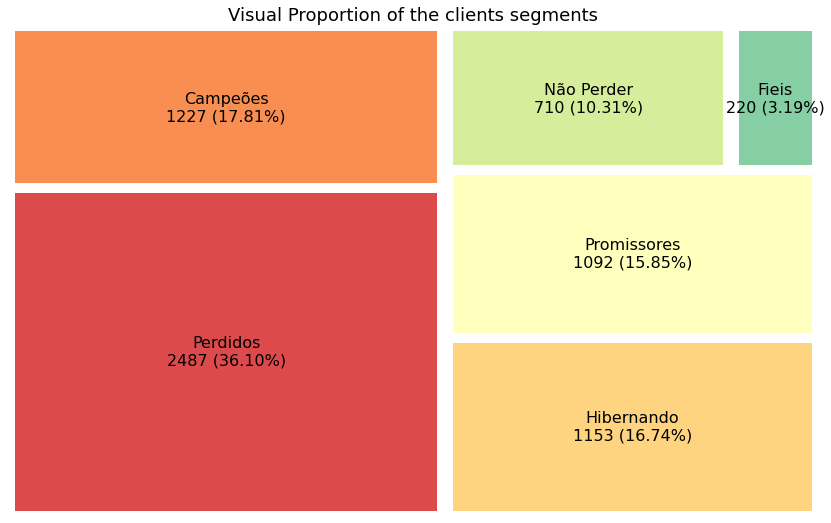

In [ ]:
# create a plot figure with figsize
plt.figure(figsize=(14.56, 9))
axis = squarify.plot(sizes = segmentation, label=segmentation.index,
              pad = 2,
              color=sb.color_palette("Spectral",  7),
              text_kwargs={'fontsize': 16})
plt.axis('off')
axis.set_title("Visual Proportion of the clients segments", fontsize=18)
plt.show()

In [ ]:
# Gráfico de barras com receita e ticket médio segmentado por grupo
rfm_Revenue = rfmSegmen.groupby('Segmento')['monetary value'].describe()
rfm_Revenue['Revenue per segment'] = rfmSegmen.groupby('Segmento')['monetary value'].sum()

In [ ]:
rfm_Revenue = rfm_Revenue[['mean', 'Revenue per segment']]

In [ ]:
rfm_Revenue

,mean,Revenue per segment
Segmento,,
Campeões,1669.951915,2049031
Fieis,1277.627273,281078
Hibernando,961.390286,1108483
Não Perder,1637.545070,1162657
Perdidos,1056.657419,2627907
Promissores,819.444139,894833


In [ ]:
total_revenue = rfm_Revenue['Revenue per segment'].sum()
print('A receita total é: R$', round(total_revenue,2))

A receita total é: R$ 8123989


In [ ]:
# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, vertical_spacing=0.001)

fig.append_trace(
    go.Bar(x=rfm_Revenue['Revenue per segment'],
           y=rfm_Revenue.index,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Revenue per client segment',
    orientation='h',
),1,1)

fig.append_trace(
    go.Bar(
        x= rfm_Revenue['mean'],
        y=rfm_Revenue.index,
        marker=dict(
          color='rgba(121, 0, 127, 0.6)',
          line=dict(
              color='rgb(121, 0, 127,1.0)',
              width=1),
        ),
        name = 'Mean ticket per client segment',
        orientation = 'h'
),1,2)

fig.update_layout(
    title='Porportion between Revenue and Mean ticket per client segment.',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),

    legend=dict(x=-0.010, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_revenue = np.round(rfm_Revenue['Revenue per segment'])
y_mean = np.rint(rfm_Revenue['mean'])
x = rfm_Revenue.index

# Adding labels
for ydn, yd, xd in zip(y_mean, y_revenue, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x= 390 + ydn,
                            text='R$ ' + '{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x= 4500000 + yd,
                            text= 'R$' + '{:,}'.format(yd) + ' (' + '{:.2%}'.format(yd/total_revenue) + ')',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)


fig.show()